# Nachweis der Umstellung von JDBC auf JPA

Jupyter Notebook Demo mit Python, pandas und matplotlib.

## Kontext

Diese Analyse weist die Umbauarbeiten aus dem Technical Requirement AB311 nach. Hier soll die Standardisierung hin zu JavaEE 8 vorgenommen werden. In diesem Zuge soll die Datenbankzugriffstechnologie JPA\* statt JDBC\*\* genutzt werden.

<sub><sup>\*JPA: Java Persistence API (neuere Zugriffsmöglichkeit auf eine Datenbank)</sub></sup><br/>
<sub><sup>\*\*JDBC: Java Database Connectivity (klassische Zugriffsmöglichkeit auf Datenbank)</sub></sup>


## Idee

### Tracking der Änderungen über das Versionskontrollsystem
Einlesen der Entwicklungshistorie mit Projektstand vom 15.01.2019 aus dem Versionskontrollsystem der Software.

In [1]:
import pandas as pd
log = pd.read_csv("../dataset/git_log_refactoring_simple.csv", parse_dates=[3])
log.head()

,additions,deletions,file,timestamp
0,19,0,repository/jpa/JpaOwnerRepositoryImpl.java,2017-12-31 19:41:29
1,55,0,repository/jpa/JpaVisitRepositoryImpl.java,2017-12-30 12:48:20
2,29,0,repository/jpa/JpaVisitRepositoryImpl.java,2017-12-30 12:48:20
3,0,99,web/VisitController.java,2017-12-30 00:38:54
4,19,0,model/Pet.java,2017-12-30 00:38:54


### Erkennung der Framework-Komponenten

Mit Hilfe eines regulären Ausdrucks können die beiden Datenbankzugriffstechnologien aus dem Dateipfad extrahiert werden. Alle sonstigen Dateien werden mittels `dropna()` herausgefiltert.

In [2]:
log['tech'] = log['file'].str.extract("/(jpa|jdbc)/")
log = log.dropna()
log.head()

,additions,deletions,file,timestamp,tech
0,19,0,repository/jpa/JpaOwnerRepositoryImpl.java,2017-12-31 19:41:29,jpa
1,55,0,repository/jpa/JpaVisitRepositoryImpl.java,2017-12-30 12:48:20,jpa
2,29,0,repository/jpa/JpaVisitRepositoryImpl.java,2017-12-30 12:48:20,jpa
25,0,47,repository/jpa/package-info.java,2017-12-29 15:28:42,jpa
103,0,26,repository/jpa/JpaOwnerRepositoryImpl.java,2017-12-25 01:27:16,jpa


## Analyse

### Arbeitsfortschritt
Um den Fortschritt nachvollziehen zu können, berechnen wir als Annäherung die geänderten Quellcodezeilen.

In [3]:
log['lines'] = log['additions'] - log['deletions']
log.head()

,additions,deletions,file,timestamp,tech,lines
0,19,0,repository/jpa/JpaOwnerRepositoryImpl.java,2017-12-31 19:41:29,jpa,19
1,55,0,repository/jpa/JpaVisitRepositoryImpl.java,2017-12-30 12:48:20,jpa,55
2,29,0,repository/jpa/JpaVisitRepositoryImpl.java,2017-12-30 12:48:20,jpa,29
25,0,47,repository/jpa/package-info.java,2017-12-29 15:28:42,jpa,-47
103,0,26,repository/jpa/JpaOwnerRepositoryImpl.java,2017-12-25 01:27:16,jpa,-26


### Zeitliche Zusammenführung
Die jeweiligen Fortschritte werden nach ihren Zeitstempeln zusammengeführt.


In [4]:
log_timed = log.groupby(['timestamp', 'tech']).lines.sum()
log_timed.head()

timestamp            tech
2013-05-15 03:35:33  jdbc    250
2013-05-16 02:15:44  jdbc     50
2013-05-17 15:12:26  jdbc     78
2013-05-24 05:52:31  jdbc    142
2013-05-28 08:15:35  jdbc    123
Name: lines, dtype: int64

### Darstellung
Für den Vergleich der Fortschritte werden beide Technologien nebeneinander aufgeführt.

In [5]:
log_progress = log_timed.unstack().fillna(0).cumsum()
log_progress.head()

tech,jdbc,jpa
timestamp,,
2013-05-15 03:35:33,250.0,0.0
2013-05-16 02:15:44,300.0,0.0
2013-05-17 15:12:26,378.0,0.0
2013-05-24 05:52:31,520.0,0.0
2013-05-28 08:15:35,643.0,0.0


### Derzeitiger Stand der Technologieumstellung
Dargestellt nach den Zeilenänderungen je Technologie.

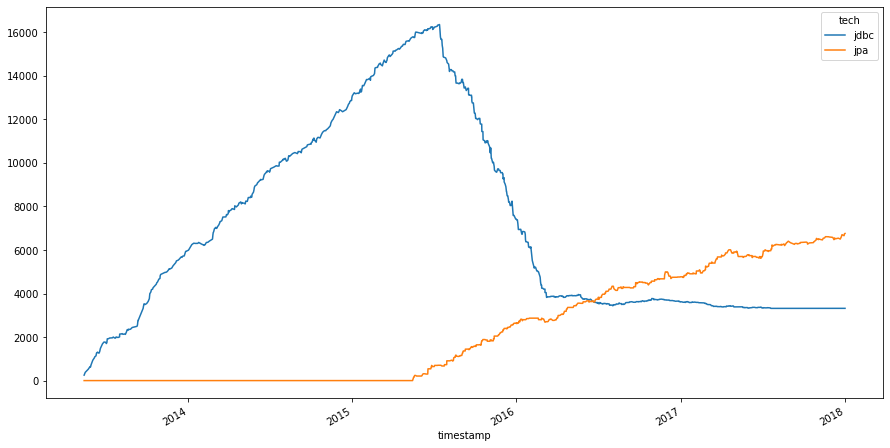

In [6]:
log_progress.plot(figsize=[15,8]);

## Ergebnis
- Die Umbauarbeiten sind gut vorangeschritten.
- Es gibt keine Änderungen mehr im JDBC-Teil.
- Ein komplettes Löschen der restlichen JDBC-Bestandteile kann in den nächsten beiden Sprints stattfinden, da bereits alles auf JPA umgestellt wurde.